This is an ipython notebook. Lectures about Python, useful both for beginners and experts, can be found at http://scipy-lectures.github.io.

I recommend installing the [Anaconda](https://store.continuum.io/cshop/academicanaconda) distribution. Make sure not to pay for it! Click Anaconda Academic License; it should be free for those with academic e-mail addresses.


Open the notebook by (1) copying this file into a directory, (2) in that directory typing
ipython notebook
and (3) selecting the notebook.
You type in commands and then hit 'Shift Return' to execute them.


# Introduction and motivation

In the Hardy-Weinberg notebooks, we found that human populations have structure--individuals tend to be slightly more similar to individuals within their group than they are to individuals in other populations. A consequence is that the heterozygosity in a structured population is less than you would expect by chance. This suggests that heterozygosity can be used to measure the degree of differentiation between populations. It can also be used to measure inbreeding. We'll explore these two applications in this notebook.

Let's start with what we observed in the Hardy-Weinberg notebook. We defined the excess heterozygosity as 

$e_{IT}=\frac{\mbox{observed proportion of hets}}{\mbox{expected proportion of hets}}=\frac{ H_{obs}}{H_{IT}},$


where $H_{obs}$ is the observed number of heterozygotes, and $H_{IT}=2 p (1-p) N$ is the expected number of heterozygotes under a random mating assumption (I'll explain the subscript $IT$ in a second). This excess of heterozygotes equals one in a randomly mating population, and zero when there are no heterozygotes (an excess below 1 corresponds to a lack of heterozygotes). 

Usually, this "$e$-statistic" is close to one within species--there is not a vast change in the number of heterozygotes compared to the uniform random-mating assumptions. Because population geneticists are often interested in *departures* from the random-mating assumptions, they usually consider how far $e$ is from 1. This defines the $F$-statistic:

$F_{IT}=1-e_{IT}=1-\frac{H_{obs}}{H_{IT}}$.


We found that this $F_{IT}$ is larger than $0.$ So mankind is not a randomly mating populations. But there are (at least) two phenomena that can lead to fewer heterozygotes. You could have population structure, where individuals tend to choose partners within their sub-populations. And we could have inbreeding, where individuals tend to choose partners among their relatives. Population structure and inbreeding have similar effects on global heterozygosity, but there is a way to distinguish the two. When a population is divided into two randomly-mating sub-populations, there should be no departures from Hardy-Weinberg within each sub-population. By contrast, in a case of "pure" inbreeding, when individuals just prefer to mate with relatives but there is no additional structure in the population, the lack of heterozygosity should be maintained within the sub-populations. 

So if we want to look for population structure, we first look at the global loss in heterozygosity, then find how much of it we can blame on within-population shenanigans, and we attribute the rest to population structure. Shenanigans can mean inbreeding, but it can also mean population structure within the sub-population, and other similar complications. It is *not* standard nomenclature. 



In the Hardy-Weinberg notebook, we computed the excess of heterozygosity in the whole population, which we now call $e_{IT},$ the excess of heterozygotes in individuals ($I$) compared to the expectation based on the entire population $T$. We also computed $e_{shenanigans},$ the excess heterozygosity remaining even after we took into account differences in population frequency. Let's call this $e_{IS},$ the excess heterozygosity in individuals $I$ compared to the expectation based on frequencies in subpopulation $S$. As a reminder, we found that $e_{IT}$ was significantly smaller than one, meaning that $F_{IT}>0.$ We also found that $e_{IS}\simeq 1,$ so that there was no substantial evidence for shenanigans: $F_{IS}=1-e_{IS}\simeq 0$.    

This suggests that the lack of heterozygocity is indeed due to population stucture. To formalize this, let's say that the frequency of the $A$ allele in the population is $p$, and that this frequency is $p_i$ in subpopulation $i$. We can write the expected number of heterozygotes based on the allele frequency in total population, $H_T=2 p (1-p) N$, where $N$ is the sample size. Similarly, the expectation based on the allele frequencies in each sub-populationis $H_S=\sum_i 2 N_i p_i (1-p_i),$ where  $N_i$ the sample size of population $i$.  
We can divide $e_{IT}$ in two components:

$$e_{IT}=\frac{H_{obs}}{H_T}=\frac{H_{obs}}{H_S}\frac{H_S}{H_T}$$

The first term on the right-hand side corresponds to $e_{IS}:$ the excess of heterozygotes given population expectations. The second term, then, tells us about the excess of heterozygocity due to differences between subpopulations. We define $e_{ST}=\frac{H_S}{H_T}$ and $F_{ST}=1-e_{ST}.$ So we have

$$e_{IT}=e_{IS}e_{ST}.$$

If we express these in terns of $F$-statistics, we get 
$$1-F_{IT}=\left(1-F_{IS}\right)\left(1-F_{ST}\right).$$

$F_{ST}$ is the most commonly used of the three statistics. To calculate it directly, we use the definition $e_{ST}=\frac{H_S}{H_T}$ and the expectations for $H_S$ and $H_T$ computed above. 

The math gets a bit more involved here. Give it a shot, but it's ok if things are a bit confusing until the end of the mathematical interlude.  

$$F_{ST}=1-e_{ST}=1-\frac{\sum_i N_i p_i (1-p_i)}{N p (1-p)}.$$

You can verify that this can be rewritten as

$$F_{ST}= \frac{\mbox{var}(p_i)}{p (1-p)},$$

where $\mbox{var}(p_i)$ is the variance in the allele frequency between populations, defined as 

$$\mbox{var}(p_i) \equiv E(p_i^2)-E(p_i)^2=\sum_i \frac{N_i}{N} p_i^2 -  \left(\sum_i \frac{N_i}{N} p_i\right)^2.$$


This sounds like a pretty clear definition, but there is a lot of different ways to estimate $F_{ST}$ from data. 

# Reading assigment
[This article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3759727/) provides a nice description of the different issues involved. Please take the time to read it. It's ok if you don't get all the subtleties, but you should be able to describe the general idea.

One of the challenges is differences in sample size: If our goal is to partition the missing heterozygosity in a given sample, the definition above is appropriate: $F_{ST}$ will give us the reduction in heterozygosity due to population structure. Unfortunately, this will depend on the sample size from each population, so it won't be super useful to compare across experiments. If we want to use $F_{ST}$ to measure absolute differentiation between two populations, it may be convenient to use equal size for each population $N_i=\frac{N}{\#subpopulations}$. These will give different answers, and there is no single "best" answer. 

Here we'll use the sample-size independent definition. For $F_{ST}$ between two populations: 

$$F_{ST}= \frac{\mbox{var}(p_i)}{p (1-p)},$$

There are two ways in which we could interpret $\mbox{var}(p_i)$: as a sample variance, and as a population variance in the allele frequencies. 
If we interpret $\mbox{var}(p_i)$ to be the sample variance in allele frequencies, we would get:

$$\begin{split}
\mbox{var}(p_i) \equiv E(p_i^2)-E(p_i)^2&= \frac{p_1^2+p_2^2}{2} -  \left(\frac{p_1+p_2}{2}\right)^2.\\
&=\frac{(p_1-p_2)^2}{4}.
\end{split}
$$

Putting the last two equations together, we get:



$$F_{ST, \mbox{sample}}= \frac{(p_1-p_2)^2}{4 p (1-p)}.$$ 


Most approaches to estimate $F_{ST}$ interpret $\mbox{var}(p_i)$ as a *population* variance, where we imagine that the two populations themselves either have evolved from a common ancestral population, or are drawn from an imagined set of populations, all derived from the same ancestral population, and we are trying to estimate the variance of that set of populations relative to the ancestral frequency. In that case, we need to account for the fact that the sample variance will be underestimated by a factor of two, so that the estimate would read: 

$$F_{ST, \mbox{population}}= \frac{(p_1-p_2)^2}{2 p (1-p)}.$$

I dislike this interpretation, because it tries to measure the variance of a distribution that does not exist. But it is the most common, and it only differs from the sample definition by a factor of 2. 

There is another way of thinking about $F_{ST}$, which is hinted at by equation:
$$F_{ST}= \frac{\mbox{var}(p_i)}{p (1-p)}.$$

The numerator is the variance in the allele frequency across populations, and the numerator happens to equal the variance in the genotype if we sample one haploid genotype from the entire population. The numerator tells us about inter-population variance, and the denominator tells us something about the total variance in the genotype. So $F_{ST}$ is telling us something about the proportion of the variance "due to" frequency differences across populations. 

## Wahlund's principle
To formalize this, we can use the law of total variance. Let $g$ be the genotype of one particular haploid sample drawn from the entire population ($g=0$ or $1$). The variance $\mbox{var}(g)$ over all possible samples is simply $p (1-p)$ (since it is a bernoulli trial). The law of total variance is useful to break down the variance of a variable into variance components due to intermediate variables, especially useful when we have a two-step random process. Here, we can imagine that we draw a population first, then draw an allele from that population. the intermediate variable in this case is $i$, the selected population. The law of total variance states that 
 
$$\mbox{var}(g) = \mbox{var}(E[g|i])+ E[\mbox{var}[g|i]]  $$
The expectation of $g$ knowing that we sampled from population $i$ is $p_i$. The variance of $g$ knowing $i$ is $p_i (1-p_i).$ So the variance of $g$ is 

$$\mbox{var}(g) = p (1-p) = \mbox{var}(p_i)+ E[p_i (1-p_i)].$$

Since $F_{ST}= \frac{\mbox{var}(p_i)}{p (1-p)},$ we can interpret it as the proportion of genotype variance that can be attributed to differences across populations. The last equation is sometimes referred to as the Wahlund principle. BEcause all three terms are non-negative, it implies that the expected heterozygosity in the subpopulation (the right-most term) is always smaller than expected heterozygosity under Hardy-Weinberg (the left-most term).
**(end of the mathematical interlude)**

An $F_{ST}$ of zero means that allele frequencies are equal in the subpopulation (hence no detectable population structure), and an $F_{ST, population}$ of two is the maximum possible divergence, which can only happen when $p=0.5$, $p_1=0$, $p_2=1$, or vice versa.











Have a look at the [wikipedia page](http://en.wikipedia.org/wiki/F-statistics) for a different exposition of the same ideas. If you find a better explanation somewhere, let me know!  

# Implementation
In this notebook we'll want to look at the different $F$-statistics across populations in the 1000 Genomes project. These statistics depend on the number of homozygotes and heterozygotes in each subpopulation. So we'll have to count the number of homozygotes and heterozygotes as in the Hardy-Weinberg example, but we'll have to do that within each population. 

Fortunately, we already did most of the work in the Hardy-Weinberg notebook. The only difference now is that we'll want to read the SNP for all the populations at the same time.  



In [1]:
### 1
import allel
import os
import gzip
print(allel.__version__)
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)
import patsy
import statsmodels.api as sm
import itertools


1.2.1
scikit-allel 1.2.1


## Loading and cleaning the data
The first step is to import the data

In [2]:
### 2
vcf_file_name = 'ALL.chr22.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz'

vcf_file_path = os.path.join('..',  'data', '1000G', vcf_file_name)
h5_file_name = "chr22.h5"
h5_file_path =  os.path.join('..',  'data', '1000G', h5_file_name)
### 4
try:
    callset = h5py.File(h5_file_path, mode='r')
except OSError:
    allel.vcf_to_hdf5(vcf_file_path, h5_file_path, fields='*', overwrite=True)
    callset = h5py.File(h5_file_path, mode='r')
    


Filter for biallelic loci

In [3]:
### 3
genotypes = allel.GenotypeChunkedArray(callset['calldata/GT'])
allele_counts = genotypes.count_alleles()


is_biallelic = allele_counts.is_biallelic_01()

def report_filter(filter_vector):
    kept = np.sum(filter_vector)
    length = filter_vector.shape[0]
    print("kept %d out of %d. Ratio kept: %2.2f " % (kept, length, kept/length))


genotypes_biallelic = genotypes.compress(is_biallelic)
pos_biallelic = callset['variants/POS'][:].compress(is_biallelic)
report_filter(is_biallelic)


kept 1093133 out of 1103547. Ratio kept: 0.99 


Extract positions in the bed file.

In [4]:
### 4
bed_file = os.path.join('..', 'data', '1000G', '20141020.strict_mask.whole_genome.bed')
### 39
mask_bed = pandas.read_csv(bed_file, sep='\t', header=None)
mask_bed = mask_bed.loc[mask_bed[0] == 'chr22']
n_features = mask_bed.shape[0]
print("number of features:", n_features)


number of features: 55707


In [5]:
### 5
in_mask = (pos_biallelic<0) # Initialize with all False
i = 0
for _index, feature in mask_bed.iterrows():
    i+=1
    if i%10000 == 0:
        print("processed", i, "features out of", n_features)

    start = feature[1]
    end = feature[2]
      
    in_mask = np.logical_or(in_mask, np.logical_and(pos_biallelic>=start, 
                                                    pos_biallelic<=end))



processed 10000 features out of 55707
processed 20000 features out of 55707
processed 30000 features out of 55707
processed 40000 features out of 55707
processed 50000 features out of 55707


In [6]:
### 6
report_filter(in_mask)
strict_genotypes = genotypes_biallelic.compress(in_mask)
strict_positions = pos_biallelic.compress(in_mask)

kept 742649 out of 1093133. Ratio kept: 0.68 


We also need to import the names of the individuals, as in the Hardy-Weinberg notebook. 

In [7]:
### 7
population_file_name = 'integrated_call_samples_v3.20130502.ALL.panel'
population_file = os.path.join('..', 'data', '1000G', population_file_name)
samples = pandas.read_csv(population_file, sep='\t')
samples.head()
populations = np.array(samples['pop'].value_counts().keys())

samples.reset_index(drop=True, inplace=True)
samples.head()

subpops = {
    # for each population, get the list of samples that belong to the population
    pop_iter: samples[samples['pop'] == pop_iter].index.tolist() for pop_iter in populations
}



Then get some information about the populations and superpopulations:

In [8]:
### 8
superpops = samples['super_pop'].value_counts().keys()
pop_by_superpop = {}
continent_by_population = {}
for spop in superpops:
    is_in_superpop = samples['super_pop'].isin({spop})
    subsample = samples[is_in_superpop]
    pops = subsample['pop'].value_counts().keys()
    pop_by_superpop[spop] = list(pops)
    for pop in list(pops):
        continent_by_population[pop] = spop    
    
continentcolor = {'SAS':'r', 'EAS':'b', 'AMR':'orange', 'AFR':'g', 'EUR':'m'}


pop_by_superpop

{'AFR': ['GWD', 'YRI', 'ESN', 'LWK', 'ACB', 'MSL', 'ASW'],
 'EAS': ['CHS', 'JPT', 'CHB', 'KHV', 'CDX'],
 'EUR': ['TSI', 'IBS', 'FIN', 'CEU', 'GBR'],
 'SAS': ['GIH', 'ITU', 'STU', 'PJL', 'BEB'],
 'AMR': ['PUR', 'CLM', 'PEL', 'MXL']}

Get a list of populations sorted by continent

In [9]:
### 9
sorted_pops = [pop for spop in pop_by_superpop.keys() for pop in pop_by_superpop[spop] ]

## Computing $F_{ST}$ 
 
Because F statistics are a staple of population genetics, the scikit-allel package has many functions to compute them (see [this link](https://scikit-allel.readthedocs.io/en/latest/stats/fst.html)). We'll compute Fst with the packaged functions first, but we'll also compute it ourselves. 

We'll start with the Weir-Cockerham estimator. This approach is described [here](https://www.researchgate.net/publication/200102299_Weir_BS_Cockerham_CC_Estimating_F-Statistics_for_the_Analysis_of_Population-Structure_Evolution_38_1358-1370/download). The article is very technical, so read at your own risk.  

Weir and Cockerham define three quantities ($a$, $b$, and $c$), related to Wright's F-statistics

$F_{ST} = \frac{a}{a+b+c}$

$F_{IS} = \frac{b}{b+c}$

$F_{IT} = \frac{a+b}{a+b+c}.$






In [10]:
### 10
a, b, c = allel.weir_cockerham_fst(strict_genotypes,
                                   [subpops[pop] for pop in subpops.keys()], 
                                   max_allele=1)

In [11]:
### 11
fst_WC = a/(a+b+c)

The Weir-Cockerham estimator is designed to work with arbitrary number of alleles, and reports and Fst for each allele. In the biallelic case, this is not useful.

In [12]:
### 12
fst_WC

array([[ 1.94092728e-04,  1.94092728e-04],
       [ 9.62444720e-02,  9.62444720e-02],
       [ 4.40610150e-02,  4.40610150e-02],
       ...,
       [-1.48409725e-04, -1.48409725e-04],
       [-3.54580625e-04, -3.54580625e-04],
       [ 4.50502238e-05,  4.50502238e-05]])

In [13]:
### 13
fst_WC = fst_WC[:,0]
fst_WC

array([ 1.94092728e-04,  9.62444720e-02,  4.40610150e-02, ...,
       -1.48409725e-04, -3.54580625e-04,  4.50502238e-05])

This provides one estimate of $F_{ST}$ for each variant. If we want to get an average across all SNPs, we could take the average of all these $F_{ST}$ values. One downside of doing this is that high-variance estimates for rare variants will cause problems. An alternative is to take the average of the numerator and divide it by the average of the denominator. These won't be equal to each other. It's not clear at this point which one is best, so we might as well pick the one that has the lowest variance. 

In [14]:
### 14
ratio_of_means = np.sum(a) / (np.sum(a) + np.sum(b) + np.sum(c))
mean_of_ratios = np.mean(fst_WC)
print("ratio of means", ratio_of_means)
print("mean of ratios", mean_of_ratios)

ratio of means 0.08813838181195187
mean of ratios 0.01462917229457516


The difference between the two should not be a surprise: large values of $a$ tend to be paired up with large values of $a+b+c$. In the average of ratios, the large $a$s tend to get cancelled more:

Text(0, 0.5, 'a+b+c')

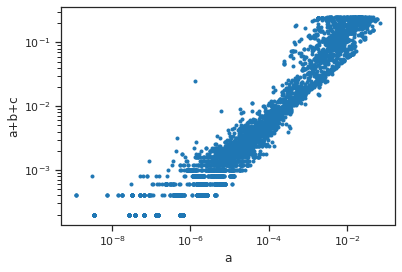

In [15]:
### 15
plt.loglog(a[:10000,0],(a+b+c)[:10000,1],'.')
plt.xlabel("a")
plt.ylabel("a+b+c")

We can now try to explore the variation in $F_{ST}$ across the genome:

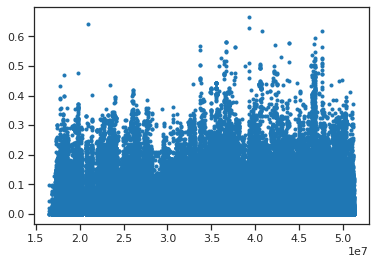

In [16]:
### 16
plt.plot(strict_positions, fst_WC[:],'.')

To bin the data, we can choose bins of constant width, or chose segments corresponding to contiguous segments from the mask file.  

In [17]:
### 17
windowed_Fst = allel.windowed_weir_cockerham_fst(strict_positions, strict_genotypes, 
                                  [subpops[pop] for pop in subpops.keys()], size = 1000000 )

In [18]:
### 18
windowed_Fst

(array([0.06638937, 0.08346435, 0.0782515 , 0.07851866, 0.07795974,
        0.07685757, 0.08640838, 0.09201452, 0.07555432, 0.09560566,
        0.07306871, 0.06829056, 0.0689898 , 0.08358981, 0.07579277,
        0.09506384, 0.08602108, 0.08446827, 0.09314758, 0.12666326,
        0.10957717, 0.08031464, 0.08287097, 0.12599294, 0.1160444 ,
        0.12964603, 0.1018896 , 0.08566202, 0.07724806, 0.10390511,
        0.10392081, 0.07805771, 0.07578544, 0.09166438, 0.07580657]),
 array([[16554752, 17554751],
        [17554752, 18554751],
        [18554752, 19554751],
        [19554752, 20554751],
        [20554752, 21554751],
        [21554752, 22554751],
        [22554752, 23554751],
        [23554752, 24554751],
        [24554752, 25554751],
        [25554752, 26554751],
        [26554752, 27554751],
        [27554752, 28554751],
        [28554752, 29554751],
        [29554752, 30554751],
        [30554752, 31554751],
        [31554752, 32554751],
        [32554752, 33554751],
        [335

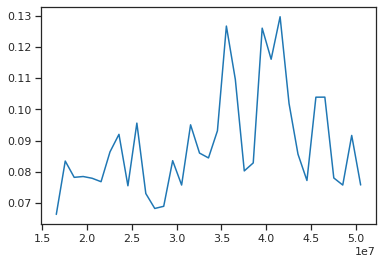

In [19]:
### 19
plt.plot(windowed_Fst[1][:,0], windowed_Fst[0],'-')

We can also bin it by contiguous segments in the bed file:

In [20]:
### 20
bed_windows = np.array([mask_bed[1]+1,mask_bed[2]]).transpose()

In [21]:
### 21
bed_fst, windows, counts = allel.windowed_weir_cockerham_fst(strict_positions, 
                        strict_genotypes, [subpops[pop] for pop in subpops.keys()], 
                        windows=bed_windows)

We can decide to only plot windows with sufficient counts, since windows with few snps will have very variable estimates of $F_{ST}$

In [22]:
### 22
has_enough_snps = (counts > 300)

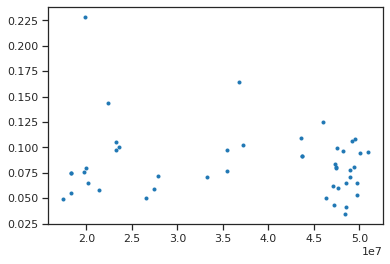

In [23]:
### 23
plt.plot(windows[:,0].compress(has_enough_snps), bed_fst.compress(has_enough_snps),'.')

It's not completely straightforward to figure out what is going on here. There is variation in the amount of $F_{ST}$, but it's hard to tell with our current knowledge whether this is due to noise, to genetic drift, or to the action of natural selection. 

## $F_{ST}$ across populations
Instead of comparing $F_{ST}$ for regions along the genome, we might want to compare pairwise $F_{ST}$ across human populations. As discussed in class, there are a few different approaches to compute $F_{ST}$. We'll first consider two approaches used by Hudson and Patterson, because they are already coded in scikit-allel. 

Notice that both functions return a numerator and a denominator, and that we compute the ratio $$\frac{E[\text{num}]}{E[\text{denom}]},$$ rather than $$E[\frac{\text{num}}{\text{denom}}]$$ 
This is related to [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3759727/), which you should have read by now! 

In [24]:
### 24
hudson = {}
hudson_SD = {}
patterson = {}
patterson_SD = {}
nblocks = 1
blocklength = (strict_positions[-1]-strict_positions[0])//nblocks
print("block length = ", blocklength)


ac_subpops = strict_genotypes.count_alleles_subpops(subpops, max_allele=1)

for p1,p2 in itertools.combinations(sorted_pops,2):

    num, den = allel.hudson_fst(ac_subpops[p1], ac_subpops[p2], fill=np.nan)
    fst = np.nansum(num) / np.nansum(den)
    hudson[(p1,p2)] = fst
    
    num, den = allel.patterson_fst(ac_subpops[p1], ac_subpops[p2])
    fst = np.nansum(num) / np.nansum(den)
    patterson[(p1,p2)] = fst
    
    

block length =  34633199


In [25]:
### 25
fstarray = np.zeros((len(populations),len(populations)))
counter = 0
for npop1,pop1 in enumerate(sorted_pops):
    for npop2,pop2 in enumerate(sorted_pops):
        if (npop1 < npop2):
            fstarray[npop1,npop2] = hudson[(pop1,pop2)]
        elif (npop1 > npop2):
            fstarray[npop1,npop2] = patterson[(pop2,pop1)]


Unless you've spend much time looking at the 1000 Genomes Data, you may not be familiar with the three-letter labels that are used to identify populations, so we'll extract those here. 

Population descriptions can be found [here](http://ftp-trace.ncbi.nih.gov/1000genomes/ftp/20131219.populations.tsv)
We'll record information about the full names of each population label, and the region of each population, so that we can sort populations by regions 

In [26]:
### 26
population_id_file_name = "20131219.populations.csv"
pandas.read_csv(population_id_file_name,sep = '\t')[['Population Code',
                                                     'Population Description',
                                                     'Super Population']]


,Population Code,Population Description,Super Population
0,CDX,"Chinese Dai in Xishuangbanna, China",EAS
1,CHB,"Han Chinese in Bejing, China",EAS
2,JPT,"Japanese in Tokyo, Japan",EAS
3,KHV,"Kinh in Ho Chi Minh City, Vietnam",EAS
4,CHS,"Southern Han Chinese, China",EAS
5,BEB,Bengali in Bangladesh,SAS
6,GIH,"Gujarati Indian in Houston,TX",SAS
7,ITU,Indian Telugu in the UK,SAS
8,PJL,"Punjabi in Lahore,Pakistan",SAS
9,STU,Sri Lankan Tamil in the UK,SAS


Finally, plot the pairwise $F_{ST}$, with the Hudson estimator in the lower corner and the Patterson in the upper right.

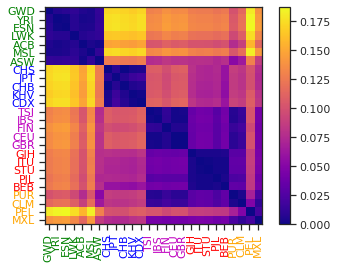

In [27]:
### 27
plt.imshow(fstarray,interpolation='nearest',cmap= 'plasma')
plt.colorbar()
ax = plt.gca()
ax.set_xticks(list(range(len(populations))));
ax.set_yticks(list(range(len(populations))));
ax.set_xticklabels(sorted_pops,rotation=90);
ax.set_yticklabels(sorted_pops);

[label.set_color(continentcolor[continent_by_population[sorted_pops[i]]]) 
    for i,label in enumerate(ax.get_xticklabels())];
[label.set_color(continentcolor[continent_by_population[sorted_pops[i]]]) 
    for i,label in enumerate(ax.get_yticklabels())];

In the next cell, describe some of your observations--I see patterns of variation both within and across continents. I want at least 4 distinct qualitative observations for which you can come up with plausible explanations.

Observations:
1) Within continents, the values of fst tend to be very low, almost close to 0. This is because of the probability of the inviduals across different populations having the same ancestors.
2) Across continents, the values of fst tend to be on the higher side. This is probably because of the populations having different ancestors due to geographical distances. 
3) For closely connected continents, such as Asia and Africa, the fst values of the pairs is on the lower side as geographical closeness and cultural similarities.
4) In some cases, despite geographical distances, the value of fst is still low because of cultural similarities, as in IBS and PUR and in other cases, despite cultural variations, fst is low because of geographical closeness, as in MXL and GIH. (This gives an idea of migration rates.)



One observation is that the two measures of $F_{ST}$ are very consistent. We can measure this explicitly:

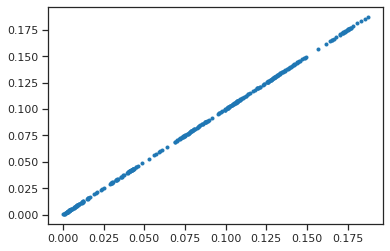

In [28]:
### 28
fst_list_patterson = list(patterson.values())
fst_list_hudson = list(hudson.values())
plt.plot(fst_list_hudson, fst_list_patterson,'.')


I find them to be perfectly correlated. Maybe the two measures are actually identical? I have not figured it out yet, but looking at the [source code](https://scikit-allel.readthedocs.io/en/stable/_modules/allel/stats/fst.html#hudson_fst) of scikit-allel.patterson_Fst (there was a TODO there on Jan 14, 2019 suggesting to try to understand whether these two estimators are exactly the same...).


Let's try to write our own $F_{ST}$ calculator. We have the formula

$$F_{ST,Sample}= \frac{(p_1-p_2)^2}{4 p (1-p)}$$


This suggests a pretty straightforward way to compute $F_{ST}$: we could estimate the sample frequency in each population $\hat p_1$ and $\hat p_2$, and an estimate of the mean frequency, such as $\hat p = \frac{\hat p_1+\hat p_2}{2}$, and $\hat F_{ST,sample}= \frac{(\hat p_1-\hat p_2)^2}{4 \hat p (1-\hat p)}.$ 

In [29]:
### 29
pop1 = "YRI"
pop2 = "CHB"
print("patterson F_ST, YRI CHB", patterson[(pop1, pop2)])
print("hudson F_ST, YRI CHB", hudson[(pop1, pop2)])

ac1 = ac_subpops[pop1]
ac2 = ac_subpops[pop2]
n1 = np.sum(ac1,axis=1)
n2 = np.sum(ac2,axis=1)

patterson F_ST, YRI CHB 0.17452565120857877
hudson F_ST, YRI CHB 0.1745256512085788


In [30]:
hat_p1 = ac1[:,1]/n1
hat_p2 = ac2[:,1]/n2
hat_p = (hat_p1 + hat_p2)/2
fst = np.nansum(((hat_p1-hat_p2)**2))/np.nansum((4*hat_p*(1-hat_p)))
print ("Our naive FST", fst)

Our naive FST 0.09794957672982285


This likely gives you a fairly different estimate. Why do you think that is? The estimate we coded up was initially proposed by Nei (1973) and Nei and Chesser (1983). It was eventually updated by Nei (1986) who added a factor of 2 to get the 'population' $F_{ST}$, as discussed earlier in this notebook. All references can be found in [Bhatia et al](https://www.ncbi.nlm.nih.gov/pubmed/23861382).     

This was a bit of a shocker to me: the definition of $F_{ST}$ given in almost all textbooks is different by a factor of two to the one reported by almost all software... 

As it turns out, the Hudson estimator (Equation 10 in Bhatia et al) can be also be estimated pretty easily. Please try it out in the next cell, and compare the Nei and Hudson estimator on a SNP-by-snp basis. 

In [31]:
### 30
hfst = np.sum(((hat_p1-hat_p2)**2 - ((hat_p1)*(1-hat_p1)/(len(ac1)-1)) - ((hat_p2)*(1-hat_p2)/(len(ac2)-1))))/np.sum(((hat_p1*(1-hat_p2)) + (hat_p2*(1-hat_p1))))
print ("Our Hudson FST", hfst)

Our Hudson FST 0.17842161695849568


More discussion on $F_{ST}$ estimators within scikit-allel can be found [here](http://alimanfoo.github.io/2015/09/21/estimating-fst.html).

## $F_{IS}$

Given all these complications around $F_{ST}$, it may come as relief that $F_{IS},$ which measures the excess of homozygosity within populations, is less controversial. We can still compute it as $\frac{H_{exp}-H_{obs}}{H_{exp}},$ with the expectation computed under Hardy-Weinberg equilibrium. Based on our last notebook, we expect that this will be close to $0$ for most populations.



In [32]:
### 31

# Get biallelic allele counts
allele_counts_biallelic_all_alleles = allele_counts.compress(is_biallelic)
relevant_column = np.array([False] * allele_counts_biallelic_all_alleles.shape[1])
relevant_column[0:2] = True
allele_counts_biallelic = allele_counts_biallelic_all_alleles.compress(relevant_column, 
                                                                       axis = 1)

# Count heterozygotes by sample and subpopulation
genotypes_012 = genotypes_biallelic.to_n_alt(fill=-1) # n_snps by n_individuals
strict_genotypes_012 = genotypes_012.compress(in_mask) # n_snps by n_individuals


genotype_012_as_triallelic_haploid = allel.GenotypeArray(strict_genotypes_012[:].reshape(
    [strict_genotypes_012.shape[0], strict_genotypes_012.shape[1], 1]))
observed_counts_by_subpop = genotype_012_as_triallelic_haploid.count_alleles_subpops(subpops, 
                                                                           max_allele=2)
het_per_sample = (genotype_012_as_triallelic_haploid==1).sum(axis = 0)


ac_subpops = strict_genotypes.count_alleles_subpops(subpops, max_allele=1)


FIS = []
for population in sorted_pops:
    allele_counts_subpop = ac_subpops[population]
    number_of_genotypes_subpop = observed_counts_by_subpop[population].sum(axis=1)
    
    #calculate expected heterozygosity 
    n = np.sum(allele_counts_subpop,axis=1)
    p_temp = allele_counts_subpop[:,1]/n
    het_expected = 2*number_of_genotypes_subpop*p_temp*(1-p_temp)
    het_obs = observed_counts_by_subpop[population][:,1]
    
    #calculate the numerator and denominator of FIS
    numerator = het_expected - het_obs
    denominator = het_expected
    
    #append FIS to FIS list
    FIS.append(np.sum(numerator)/np.sum(denominator))
FIS
    

[0.0002580376128156719,
 -0.007969437097777607,
 0.002078927937956153,
 -0.0051535260014461196,
 -0.0012863836457974842,
 -0.006428366169902454,
 -0.0002871901532013034,
 0.0003096093661730691,
 -0.006828300713478872,
 -0.003865258191265736,
 -0.010262580250564826,
 0.001104673825957311,
 -0.00436733815135117,
 0.0014097336142899167,
 -0.007241198473336658,
 -0.0011443346865862723,
 0.0018828811415910595,
 -9.958767984560283e-05,
 0.004244999413235282,
 0.019479280348561567,
 0.014675422451560395,
 0.0020185191850061062,
 -0.0026723668485710457,
 0.0002710149325158994,
 0.0013346538539051418,
 -0.0006346726022810609]

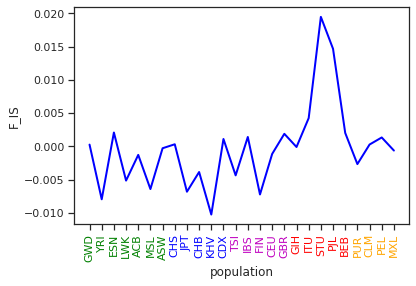

In [33]:
### 32
plt.plot(FIS,'b',lw=2);
plt.xlabel("population")
plt.ylabel("F_IS")


# I want to color-code the populations by continent and write the name below the graph 
ax = plt.gca()  # Gives a name to the current plot. 
ax.set_xticks(list(range(len(populations)))); # puts one tick-mark for each position in 
                                              # the array
ax.set_xticklabels(sorted_pops,rotation=90);  # Gives the name of the population to the tick 
                                              # mark

# Change the color of each tick label according to the continent of origin
continentcolor = {'SAS':'r', 'EAS':'b', 'AMR':'orange', 'AFR':'g', 'EUR':'m'}
[label.set_color(continentcolor[continent_by_population[sorted_pops[i]]]) 
 for i,label in enumerate(ax.get_xticklabels())];


Please interpret your results!
In particular, given the population with the highest $F_{IS},$ how much first-cousin matings would we need to explain the level of $F_{IS}$? Is that plausible? Whether plausible or not, what are possible other explanations?

Your answer: 

Copyright Simon Gravel, McGill University.